# Dataset MNIST

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print(len(mnist.train.images), len(mnist.test.images))

55000 10000


In [5]:
im_temp = mnist.train.images[0]

In [9]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

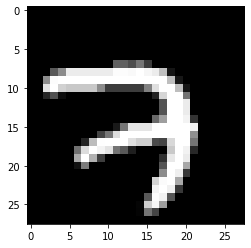

In [10]:
plt.imshow(np.reshape(im_temp,(28,28)),cmap="gray")
plt.show()

In [8]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Red Neuronal TF
* Imgs de entrenamiento MNIST viven en espacio vectorial dimensión 784(28x28)
* DataSet de 55000 filas y 784 cols
* Cada entrada del dataset es un número real entre 0 y 1

In [3]:
x = tf.placeholder(tf.float32, [None,784])

In [4]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
softmax_args = tf.matmul(x,W)+b
y_hat = tf.nn.softmax(softmax_args)

In [6]:
y_ = tf.placeholder(tf.float32,[None,10])

In [7]:
#solo la 2da dimension para tf.reduce_sum
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y_hat),reduction_indices=[1]))

In [8]:
train_step = tf.train.GradientDescentOptimizer(.5).minimize(cross_entropy)

In [9]:
sess = tf.InteractiveSession()

In [10]:
tf.global_variables_initializer().run()

In [11]:
for i in range(5001):
    batch_x, batch_y = mnist.train.next_batch(100)
    _,cross_entropy_tr = sess.run([train_step,cross_entropy], 
                                          feed_dict={x:batch_x, y_:batch_y})
    if i%1000==0:
        print(f"Epoch: {i} - crossEntropy : {cross_entropy_tr}")

Epoch: 0 - crossEntropy : 2.3025853633880615
Epoch: 1000 - crossEntropy : 0.3257993459701538
Epoch: 2000 - crossEntropy : 0.22904296219348907
Epoch: 3000 - crossEntropy : 0.33879852294921875
Epoch: 4000 - crossEntropy : 0.15429015457630157
Epoch: 5000 - crossEntropy : 0.21368223428726196


# Evaluando la red neuronal

In [12]:
correct_predictions = tf.equal(tf.argmax(y_hat,1),tf.argmax(y_,1))

In [13]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [15]:
print(sess.run(accuracy,feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9202
